In [124]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [4]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7057,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GRvanun,1525,2.0,2.0,99.13
2485,Super built-up Area,18-Mar,Yelahanka,3 BHK,Miitat,1825,3.0,1.0,105.00
6629,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1250,2.0,1.0,50.00
8030,Plot Area,Ready To Move,AGB Layout,7 Bedroom,NaN,3000,6.0,3.0,145.00
10117,Plot Area,Ready To Move,Gollarahatti,4 Bedroom,NaN,740,2.0,1.0,24.50
2448,Super built-up Area,Ready To Move,Begur Road,2 BHK,NaN,1160,2.0,2.0,40.59
4282,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,3000,4.0,3.0,306.00
8460,Super built-up Area,18-Dec,Seshadripuram,2 BHK,NaN,1217,2.0,1.0,164.00
5644,Super built-up Area,Ready To Move,Kengeri,2 BHK,NaN,725,2.0,1.0,30.00
4381,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,JRrnauv,1482,3.0,3.0,60.98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Cleaning

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df = df.drop(['area_type', 'availability','society' ,'balcony' ],axis = 1)

In [8]:
df.sample(10)

,location,size,total_sqft,bath,price
12365,Domlur,3 BHK,1650,3.0,180.00
6444,Kothnur Narayanapura,2 Bedroom,1290,1.0,77.50
7097,Laggere,1 BHK,1500,1.0,60.00
9433,Doddabanahalli,3 BHK,1290,3.0,45.33
8390,Malleshwaram,3 BHK,2050,4.0,270.00
3055,Haralur Road,2 BHK,1243,2.0,46.00
352,Sampigehalli,3 BHK,1592,3.0,75.00
2398,Ashirvad Colony,2 BHK,1000,2.0,53.00
10632,Jalahalli,2 BHK,905,2.0,55.00
7582,Old Madras Road,3 BHK,1425,2.0,74.31


In [9]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df.shape

(13246, 5)

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering
### Adding new features for bhk

In [14]:
df['BHK'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [15]:
df.sample(5)

,location,size,total_sqft,bath,price,BHK
2168,Ganga Nagar,3 Bedroom,720,3.0,65.0,3
1540,3rd Block Jayanagar,2 BHK,1000,2.0,130.0,2
9312,Anekal,1 BHK,456,1.0,15.0,1
7711,Tavarekere,7 Bedroom,1200,5.0,180.0,7
4305,Sarjapur Road,2 BHK,1308,2.0,83.0,2


In [16]:
df['BHK'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

In [17]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
df[df['BHK'] >= 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df['total_sqft'].value_counts()

## need to fix values in this .

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [20]:
def Sqft_num(x):
    token = x.split('-')
    if len(token) == 2:
        return ( float(token[0]) + float(token[1]) )/2
    try: 
        return float(x)
    except:
        return None

In [21]:
df['total_sqft'] = df['total_sqft'].apply(Sqft_num)

In [22]:
df.shape

(13246, 6)

In [23]:
df['total_sqft'].value_counts()

1200.000     843
1100.000     221
1500.000     204
2400.000     195
600.000      180
1000.000     173
1350.000     132
1050.000     123
1300.000     117
1250.000     114
900.000      112
1400.000     108
1800.000     104
1150.000     101
1600.000     100
1140.000      91
2000.000      82
1450.000      71
1650.000      69
800.000       68
3000.000      66
1075.000      66
1020.000      63
2500.000      63
1550.000      60
1160.000      60
1125.000      60
1700.000      59
950.000       59
1180.000      58
1260.000      58
1255.000      56
1080.000      55
1220.000      55
1070.000      53
700.000       53
750.000       52
1225.000      48
1175.000      48
4000.000      48
2100.000      46
1320.000      46
1240.000      46
1230.000      45
1060.000      45
1210.000      44
850.000       43
1280.000      42
1185.000      41
1270.000      41
1190.000      40
1170.000      40
1410.000      40
1750.000      39
1025.000      38
1330.000      38
1310.000      37
1850.000      37
1290.000      

In [24]:
df.sample(10)

,location,size,total_sqft,bath,price,BHK
2695,Sarjapur Road,2 BHK,1311.0,2.0,78.00,2
12460,Wheelers Road,2 BHK,925.0,2.0,68.00,2
5073,BTM 2nd Stage,2 BHK,1280.0,2.0,80.00,2
589,Nehru Nagar,2 BHK,961.0,2.0,38.00,2
2751,Balaji Gardens Layout,2 BHK,1051.0,2.0,33.00,2
10442,Bellandur,2 BHK,1211.0,2.0,63.00,2
10323,9th Phase JP Nagar,3 BHK,1571.0,3.0,65.00,3
5468,Sarjapur Road,2 BHK,1178.0,2.0,40.43,2
171,Attibele,1 BHK,450.0,1.0,11.00,1
640,Mahadevpura,2 BHK,1225.0,2.0,48.00,2


In [25]:
## Adding a new feature called price per square feet

df['price_per_sq_feet'] = df['price'] * 1000000 / df['total_sqft']

In [26]:
df.sample(10)

,location,size,total_sqft,bath,price,BHK,price_per_sq_feet
10913,3rd Phase JP Nagar,3 BHK,2400.0,3.0,270.0,3,112500.000000
10368,Sarjapur Road,2 BHK,1130.0,2.0,55.0,2,48672.566372
13094,Hoodi,2 BHK,1181.0,2.0,55.0,2,46570.702794
4163,Hoodi,2 BHK,1112.0,2.0,88.0,2,79136.690647
7647,Dodsworth Layout,3 BHK,1893.0,3.0,115.0,3,60750.132066
10260,Jalahalli East,2 BHK,1010.0,2.0,52.0,2,51485.148515
5303,Electronic City,2 BHK,1363.0,2.0,79.0,2,57960.381511
9463,Kudlu Gate,3 BHK,1535.0,3.0,85.0,3,55374.592834
759,Varthur Road,4 Bedroom,2760.0,4.0,155.0,4,56159.420290
2878,Esther Enclave Layout,5 Bedroom,1600.0,5.0,140.0,5,87500.000000


In [27]:
len(df['location'].unique())

1304

In [28]:
df['location'].value_counts()

Whitefield                                            534
Sarjapur  Road                                        392
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           233
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bellandur     

In [29]:
df['location'] = df['location'].apply(lambda x : x.strip())

In [30]:
len(df['location'].unique())

1293

In [31]:
locations_stats = df['location'].value_counts()

In [32]:
locations_stats

Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bellandur     

In [33]:
location_less_10 = locations_stats[locations_stats<=10]

In [34]:
location_less_10

Naganathapura                                         10
Sadashiva Nagar                                       10
Nagappa Reddy Layout                                  10
BTM 1st Stage                                         10
Sector 1 HSR Layout                                   10
Basapura                                              10
Ganga Nagar                                           10
Dairy Circle                                          10
Kalkere                                               10
1st Block Koramangala                                 10
Dodsworth Layout                                      10
Nagadevanahalli                                       10
Gunjur Palya                                          10
2nd Phase JP Nagar                                     9
KUDLU MAIN ROAD                                        9
4th Block Koramangala                                  9
Vignana Nagar                                          9
Ejipura                        

In [35]:
len(df['location'].unique())

1293

In [36]:
df['location'] = df['location'].apply(lambda x : "other" if x in location_less_10 else x)

In [37]:
len(df['location'].unique())

242

In [38]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sq_feet
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+04
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+06
min,1.000000,1.000000,8.000000,1.000000,2.678298e+03
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+04
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+04
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+04
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+08


## Outliers Removal

In [39]:
## removing outliers in price_per_sq_feet

def remove_priceperfeet(df):
    df_ppf_remove = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sq_feet)
        std = np.std(subdf.price_per_sq_feet)
        removed_df = subdf[(subdf.price_per_sq_feet > (mean - std)) & (subdf.price_per_sq_feet < (mean + std))]
        df_ppf_remove = pd.concat([df_ppf_remove,removed_df], ignore_index=True)
    return df_ppf_remove

In [40]:
df.shape

(13246, 7)

In [41]:
df1 = remove_priceperfeet(df)

In [42]:
df1.shape

(11428, 7)

In [43]:
df1.describe()

,total_sqft,bath,price,BHK,price_per_sq_feet
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,1534.107420,2.608768,105.062917,2.719023,63067.214330
std,1144.233331,1.210778,138.640017,1.157002,36427.066728
min,250.000000,1.000000,8.000000,1.000000,2678.298133
25%,1100.000000,2.000000,50.000000,2.000000,42857.142857
50%,1277.000000,2.000000,70.000000,3.000000,53095.654996
75%,1655.000000,3.000000,110.000000,3.000000,68481.983323
max,52272.000000,27.000000,3600.000000,27.000000,531500.000000


In [44]:


## remove bhk outliers

def remove_bhk_ouliers(df):
    df_bhk_remove = np.array([])
    for location, locationdf in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in locationdf.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sq_feet),
                'std' : np.std(bhk_df.price_per_sq_feet),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in locationdf.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                df_bhk_remove = np.append(df_bhk_remove,bhk_df[bhk_df.price_per_sq_feet<(stats['mean'])].index.values)
    return df.drop(df_bhk_remove,axis='index')
            

In [45]:
df2 = remove_bhk_ouliers(df1)

In [46]:
df2.shape

(8002, 7)

In [47]:
df2.sample(6)

,location,size,total_sqft,bath,price,BHK,price_per_sq_feet
6674,Sarjapur Road,3 BHK,1929.0,3.0,103.0,3,53395.541731
4875,Koramangala,2 BHK,1100.0,2.0,85.0,2,77272.727273
1403,Bisuvanahalli,2 BHK,845.0,2.0,32.0,2,37869.822485
724,Balagere,2 BHK,1210.0,2.0,83.0,2,68595.041322
9383,other,2 Bedroom,815.0,3.0,160.0,2,196319.018405
10662,other,3 Bedroom,1092.0,3.0,95.0,3,86996.336996


In [48]:
len(df2['bath'].unique())

17

In [49]:
df2['bath'].value_counts()

2.0     4259
3.0     1915
4.0      703
1.0      615
5.0      283
6.0      124
7.0       42
8.0       28
9.0       15
10.0       7
12.0       3
16.0       2
13.0       2
14.0       1
27.0       1
15.0       1
18.0       1
Name: bath, dtype: int64

In [50]:
df2.describe()

,total_sqft,bath,price,BHK,price_per_sq_feet
count,8002.000000,8002.000000,8002.000000,8002.000000,8002.000000
mean,1514.674263,2.591852,117.342631,2.651087,69766.106654
std,903.390103,1.246868,156.506951,1.191554,40404.529993
min,250.000000,1.000000,8.000000,1.000000,13000.000000
25%,1080.000000,2.000000,51.367500,2.000000,46818.094690
50%,1255.000000,2.000000,76.155000,2.000000,58984.305002
75%,1690.000000,3.000000,125.000000,3.000000,75000.000000
max,12000.000000,27.000000,3600.000000,27.000000,531500.000000


Text(0, 0.5, 'Count')

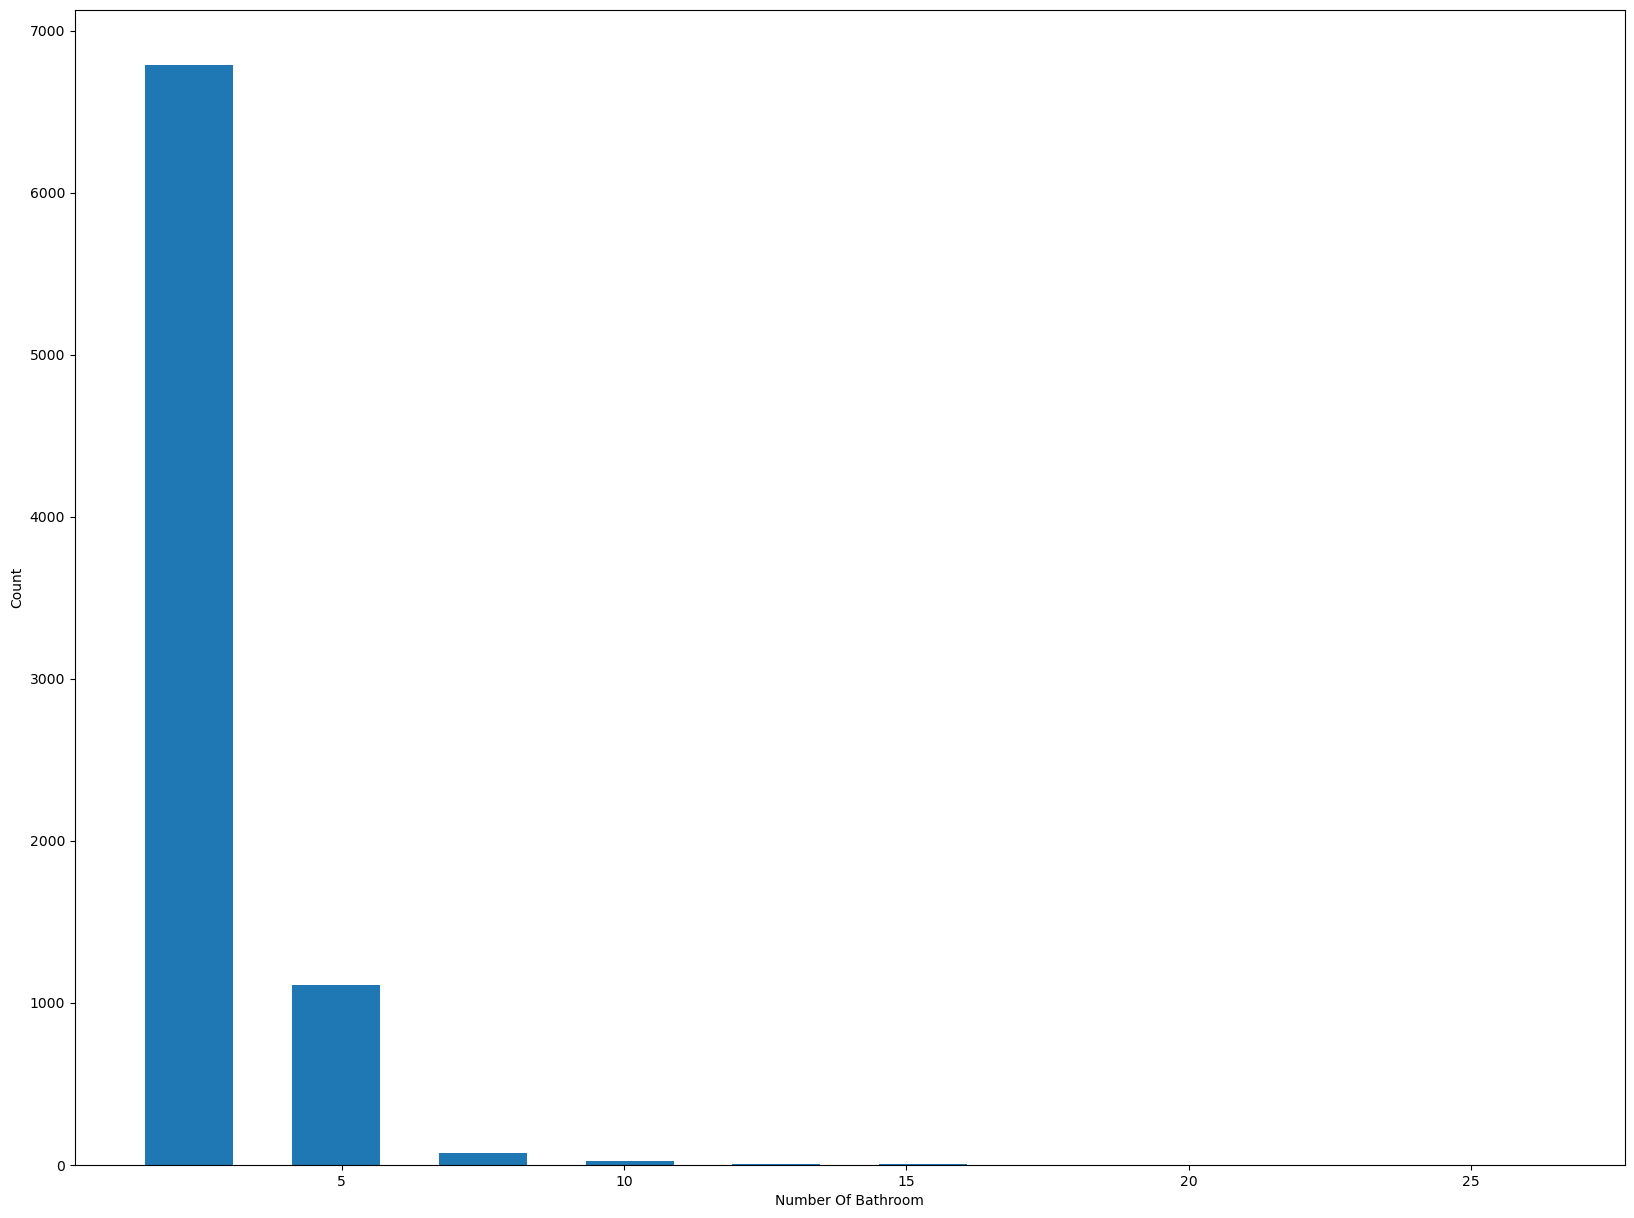

In [51]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df2.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [52]:
df2[df2.bath>df2.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sq_feet
1635,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,153333.333333
1771,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5604,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
7229,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8812,other,9 Bedroom,3300.0,14.0,500.0,9,151515.151515
9007,other,8 Bedroom,990.0,12.0,120.0,8,121212.121212
10308,other,8 Bedroom,1850.0,12.0,300.0,8,162162.162162
10693,other,3 Bedroom,2400.0,6.0,775.0,3,322916.666667
11365,other,10 Bedroom,7150.0,13.0,3600.0,10,503496.503497


In [53]:
df3 = df2[df2.bath < df2.BHK+2]

In [54]:
df3.shape

(7901, 7)

In [55]:
df3 = df3.drop(['size','price_per_sq_feet'],axis = 1)

In [56]:
dummies = pd.get_dummies(df3['location'])

In [57]:
dummies.sample(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
7185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
df4 = pd.concat([df3,dummies],axis='columns')

In [59]:
df4.sample(5)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
8946,other,8000.0,27.0,230.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1289,Benson Town,1300.0,2.0,120.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [60]:
df4 = df4.drop(['location'],axis = 1)

# Build a model

In [61]:
df4.shape

(7901, 246)

In [62]:
X = df4.drop(['price'],axis = 1)

In [63]:
y = df4['price']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

## Linear Regression

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
lr.score(X_test,y_test)

0.6505860988071441

## Decision tree regressor

In [95]:
dtr = DecisionTreeRegressor(max_depth=5)

In [96]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [97]:
dtr.score(X_test,y_test)

0.6403200296094258

## RandomForestRegressor

In [121]:
RFr = RandomForestRegressor(n_estimators=150, max_depth= 5)

In [122]:
RFr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [123]:
RFr.score(X_test,y_test)

0.7238212776831366

## Using K-fold cross validation to check accuracy

In [126]:
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=42)

In [127]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.6505861 , 0.73327372, 0.71865535, 0.68515897])

In [128]:
cross_val_score(DecisionTreeRegressor(max_depth=5), X, y, cv=cv)

array([0.64096596, 0.41557173, 0.62752647, 0.43695334])

In [129]:
cross_val_score(RandomForestRegressor(n_estimators=150, max_depth= 5), X, y, cv=cv)

array([0.70569786, 0.63943976, 0.74735835, 0.62201182])